In [224]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

import warnings
df = pd.read_excel("C:/Users/Lenovo/Downloads/Data Science and Programming/Final Project/Texas Accidents.xlsx")
df = df.drop(['ID','Source','Start_Lat','Start_Lng','End_Lat','End_Lng','Street','County','State','Country','Timezone','Airport_Code','Precipitation(in)','City','Wind_Direction'],axis=1)

#df['description_length'] = df['Description'].apply(len)
#df['Wind_Chill'] = df['Wind_Chill(F)'].fillna(df['Temperature(F)'])
df.head()





,Severity,Start_Time,End_Time,Distance(mi),Description,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,2022-10-12 13:59:30,2022-10-12 15:33:53,0.038,Incident on PRESTON RD near NORTHWOOD RD Expec...,75225,2022-10-12 13:53:00,91.0,91.0,39.0,...,False,True,False,False,False,False,Day,Day,Day,Day
1,2,2018-04-12 07:30:27,2018-04-12 08:30:18,0.000,Accident on Clay St at Caroline St.,77002-6904,2018-04-12 07:55:00,64.4,NaN,94.0,...,False,False,False,False,True,False,Day,Day,Day,Day
2,2,2021-06-10 15:45:35,2021-06-10 18:29:21,2.088,Stationary traffic on US-87 N - US-90 W - I-10...,78220,2021-06-10 15:53:00,94.0,94.0,51.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3,2,2018-10-29 06:34:59,2018-10-29 07:04:26,0.000,One lane blocked and shoulder blocked due to a...,76010,2018-10-29 06:35:00,60.3,NaN,85.0,...,False,False,False,False,False,False,Night,Night,Night,Day
4,2,2018-04-25 10:50:42,2018-04-25 11:20:28,0.000,Accident on Zephyr St at Scott St.,77021-2630,2018-04-25 10:55:00,80.6,NaN,48.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [226]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Description',
       'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [228]:
df.head()

df['Duration'] = df['End_Time']-df['Start_Time']
df['Duration'] = df['Duration'].dt.total_seconds() / 60
df['Severity_2'] = (pd.qcut(df['Duration'], q=4, labels=['1', '2', '3', '4'])).astype('int')
df.loc[:,['Duration', 'Severity_2']]
df.head()

,Severity,Start_Time,End_Time,Distance(mi),Description,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Severity_2
0,2,2022-10-12 13:59:30,2022-10-12 15:33:53,0.038,Incident on PRESTON RD near NORTHWOOD RD Expec...,75225,2022-10-12 13:53:00,91.0,91.0,39.0,...,False,False,False,False,Day,Day,Day,Day,94.383333,3
1,2,2018-04-12 07:30:27,2018-04-12 08:30:18,0.000,Accident on Clay St at Caroline St.,77002-6904,2018-04-12 07:55:00,64.4,NaN,94.0,...,False,False,True,False,Day,Day,Day,Day,59.850000,3
2,2,2021-06-10 15:45:35,2021-06-10 18:29:21,2.088,Stationary traffic on US-87 N - US-90 W - I-10...,78220,2021-06-10 15:53:00,94.0,94.0,51.0,...,False,False,False,False,Day,Day,Day,Day,163.766667,4
3,2,2018-10-29 06:34:59,2018-10-29 07:04:26,0.000,One lane blocked and shoulder blocked due to a...,76010,2018-10-29 06:35:00,60.3,NaN,85.0,...,False,False,False,False,Night,Night,Night,Day,29.450000,1
4,2,2018-04-25 10:50:42,2018-04-25 11:20:28,0.000,Accident on Zephyr St at Scott St.,77021-2630,2018-04-25 10:55:00,80.6,NaN,48.0,...,False,False,False,False,Day,Day,Day,Day,29.766667,1


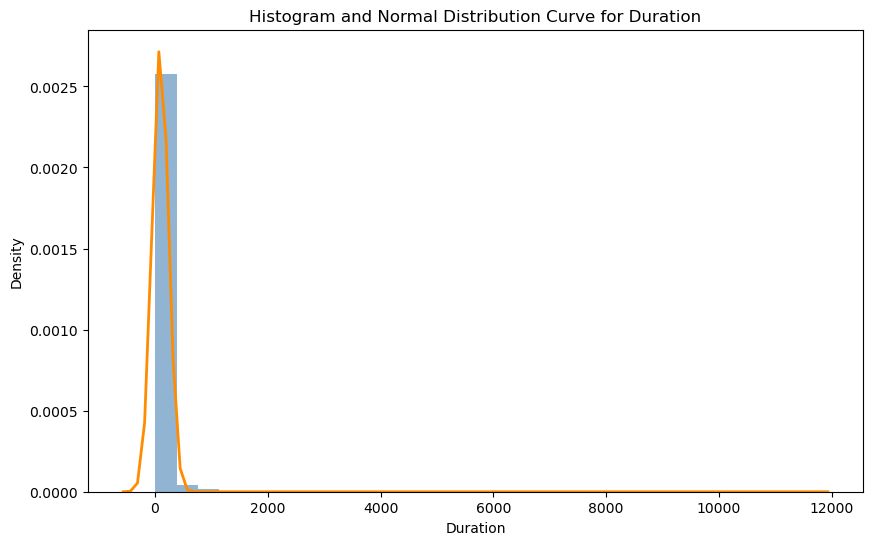

In [218]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# Assuming df['Duration'] is your series
duration_series = df['Duration']

plt.figure(figsize=(10, 6))
plt.hist(duration_series, bins=30, density=True, alpha=0.6, color='steelblue')

# Calculate the mean and standard deviation
mean = duration_series.mean()
std_dev = duration_series.std()

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'darkorange', linewidth=2)

plt.title('Histogram and Normal Distribution Curve for Duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()


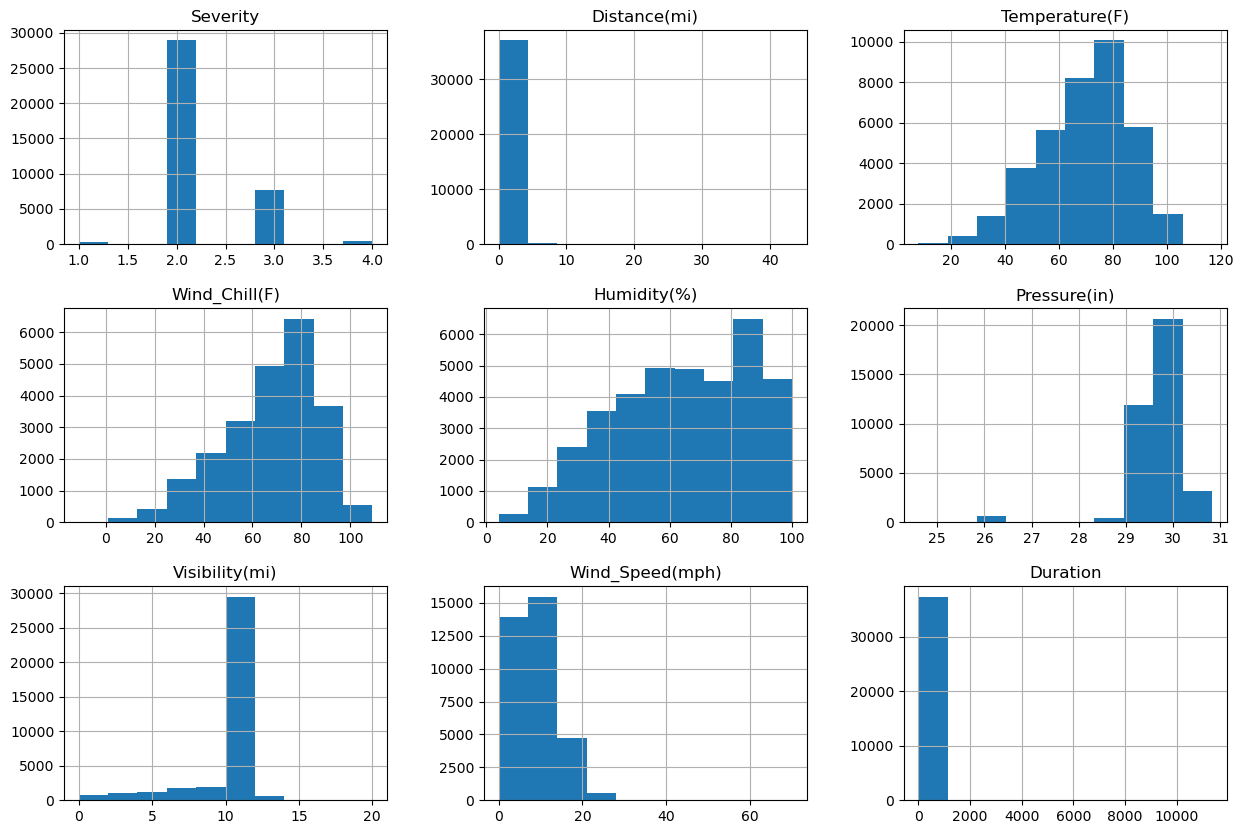

In [230]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(15, 10))
plt.show()


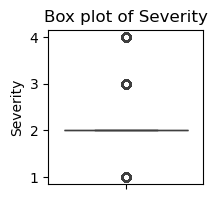

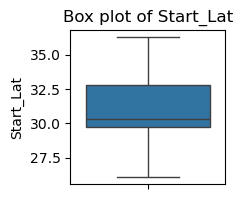

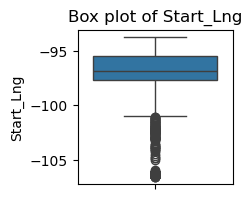

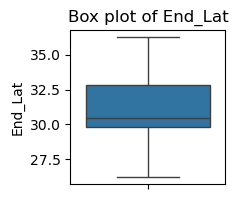

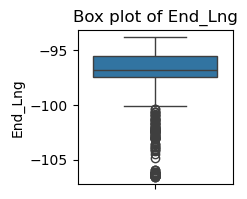

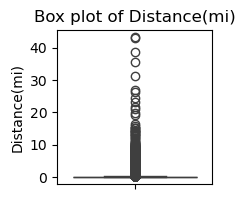

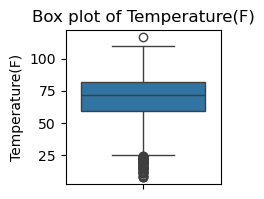

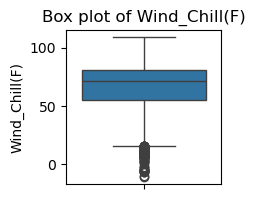

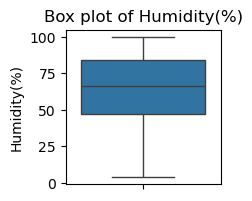

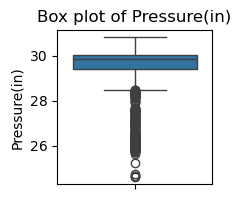

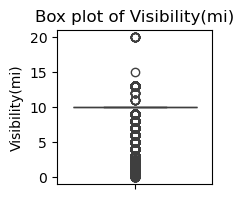

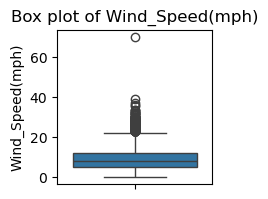

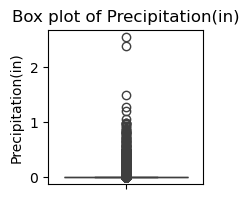

In [42]:
for column in numerical_columns:
    plt.figure(figsize=(2, 2))
    sns.boxplot(data=df, y=column)
    plt.title(f'Box plot of {column}')
    plt.show()